# Topic modelling model selection on Fetch20 dataset



## Model 1. LDA Scikit-learn implementation

In [53]:
# Imports and stopwords extension
%run pkgs/dependencies_stopwords.ipynb

# # Dataset preparation (only run once)
# %run pkgs/fetch20_dataset_preparation.ipynb

# Define data preprocessor object
%run pkgs/data_preprocessors.ipynb

# Define the sklearn LDA model with Count Vectorizer
%run pkgs/lda_modeller.ipynb

# Define auxillary functionality
%run pkgs/auxillary_functions.ipynb

# Define model selector
%run pkgs/model_selector.ipynb


# Read and preprocess the data
# prep = Preprocessor(path = 'four_groups.csv')
# df = prep(remove_digit_words = True, remove_short_words = True)

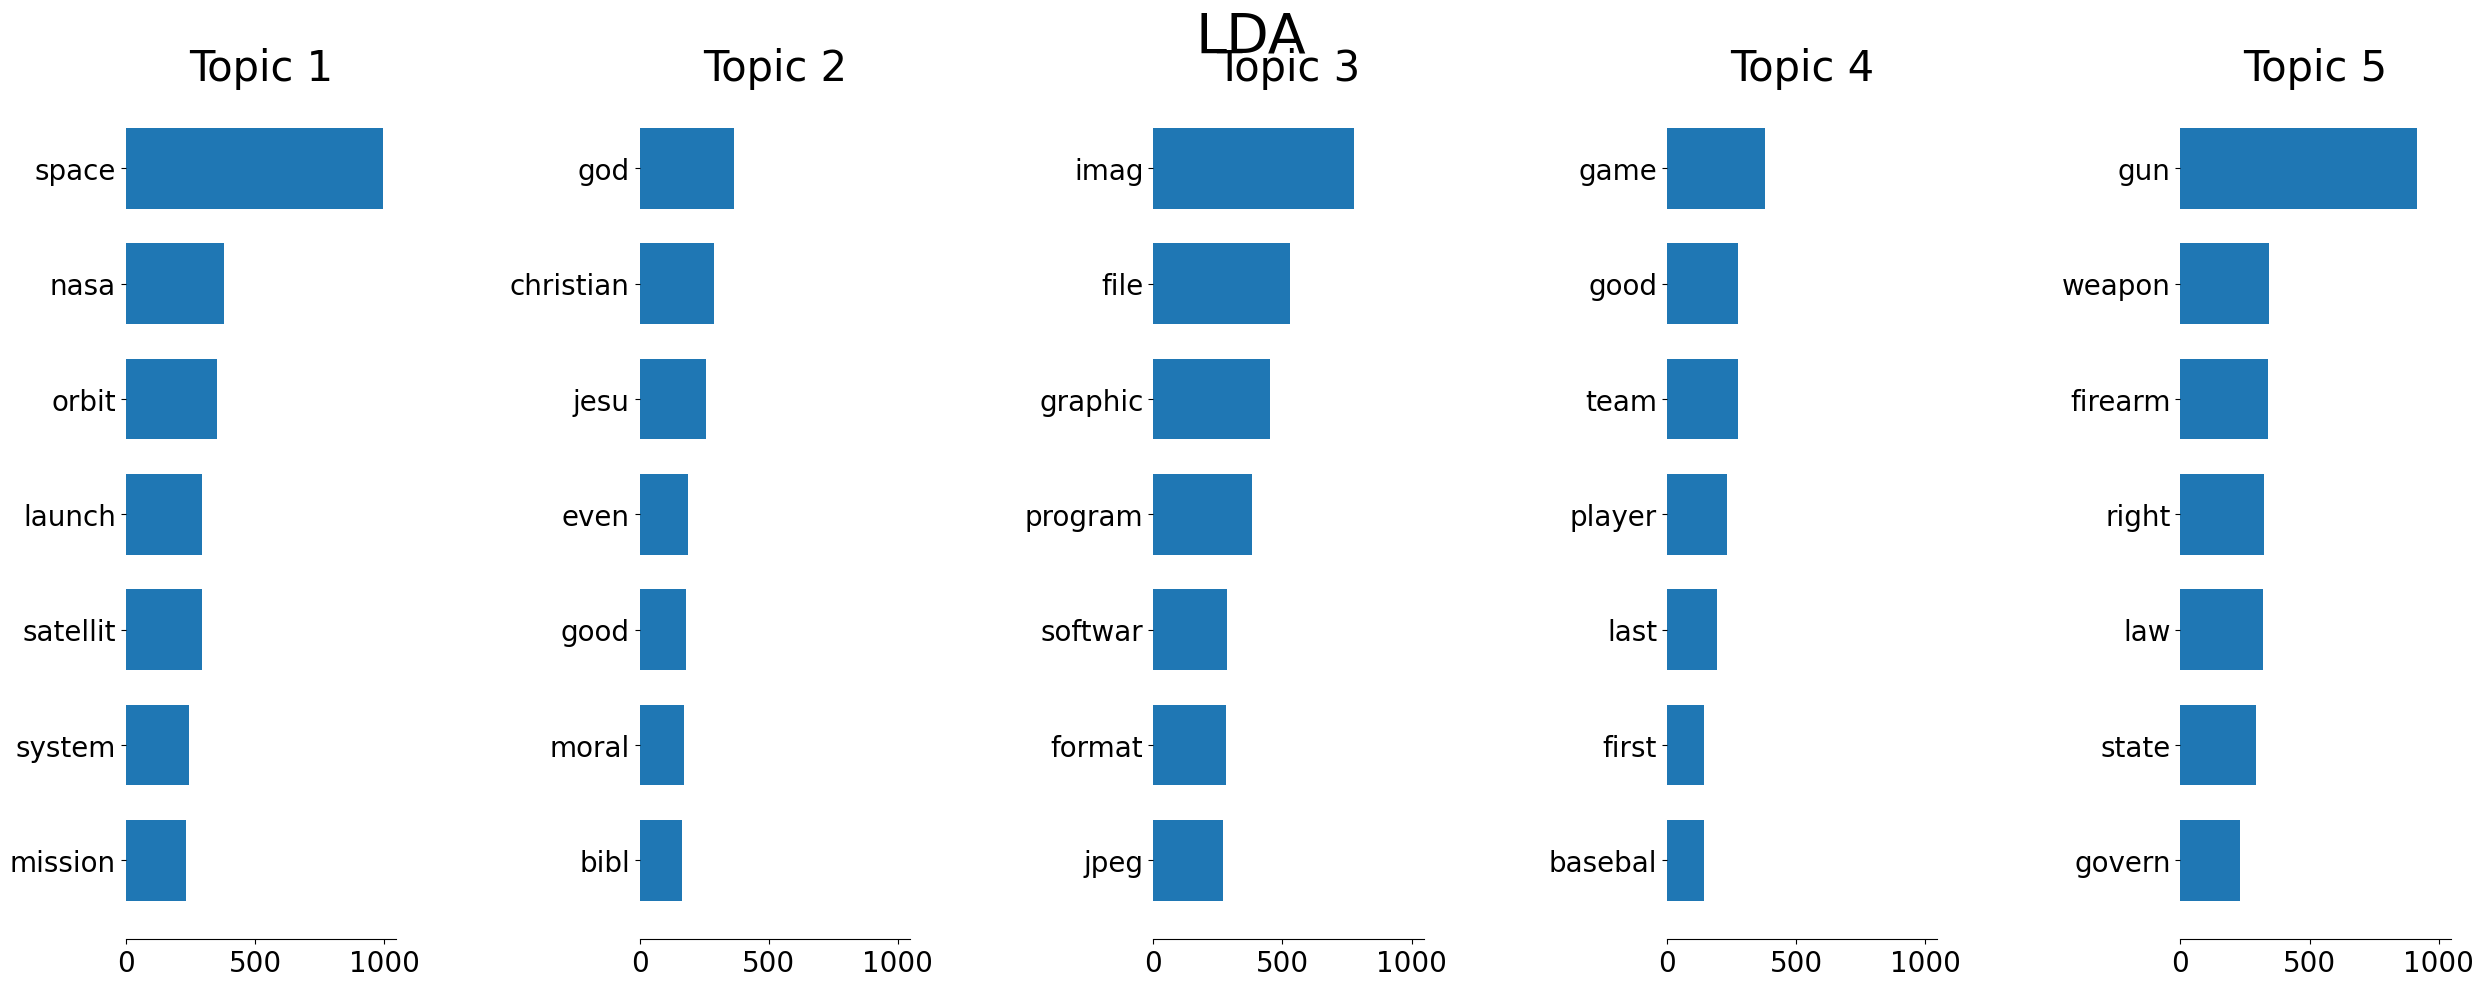

In [36]:
# Define sklearn LDA model with CountVectorizer
lda_modeller_skl = LDAmodeller(df=df, vectorizer = 'count', lib = 'skl')
lda_modeller_skl.train_lda()

In [37]:
# Estimate model accuracy
topic_vocab = {0: 'space', 1: 'religion', 2: 'graphics', 3: 'sport', 4: 'politics'}

est_accuracy(topic_vocab = topic_vocab, lda_modeller = lda_modeller_skl)

Supposed model accuracy: 0.8643649815043156


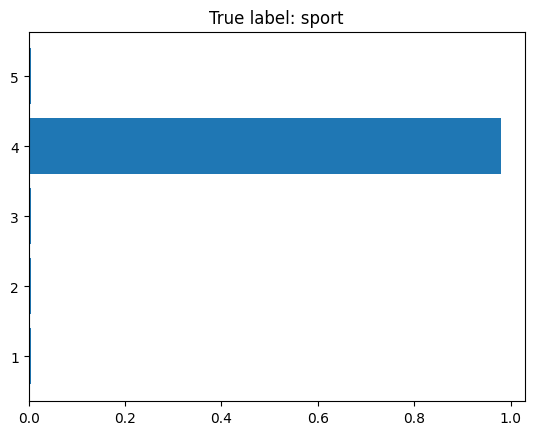

In [38]:
# Sample article topic attribution
sample_topic(lda_modeller = lda_modeller_skl, rand_seed = 0, topic_vocab = topic_vocab)

# Anorther article topic attribution
# sample_topic(rand_seed=1)

In [39]:
# Calculate the coherence, perplexity scores and log likelihood scores

vocab, words, id2word = coherence_perp_logl(lda_modeller = lda_modeller_skl)

The coherence score is: 0.76
The log perplexity score is: 7.709
The log likelihood is: -1318320.516


([LatentDirichletAllocation(max_iter=100, n_components=2, topic_word_prior=0.6),
  LatentDirichletAllocation(max_iter=100, n_components=3, topic_word_prior=0.6),
  LatentDirichletAllocation(max_iter=100, n_components=4, topic_word_prior=0.6),
  LatentDirichletAllocation(max_iter=100, n_components=5, topic_word_prior=0.6),
  LatentDirichletAllocation(max_iter=100, n_components=6, topic_word_prior=0.6),
  LatentDirichletAllocation(max_iter=100, n_components=7, topic_word_prior=0.6),
  LatentDirichletAllocation(max_iter=100, n_components=8, topic_word_prior=0.6),
  LatentDirichletAllocation(max_iter=100, n_components=9, topic_word_prior=0.6)],
 [0.5612852942479447,
  0.6137005250577454,
  0.7058485032693931,
  0.7549742947450584,
  0.6242571110605964,
  0.6529198141974532,
  0.6528040186441285,
  0.6743602599024627],
 [7.84764100796155,
  7.806228219165443,
  7.760148651916731,
  7.720846834913751,
  7.742715472205724,
  7.717404977747375,
  7.7171161886419295,
  7.722985835191863],
 [-13

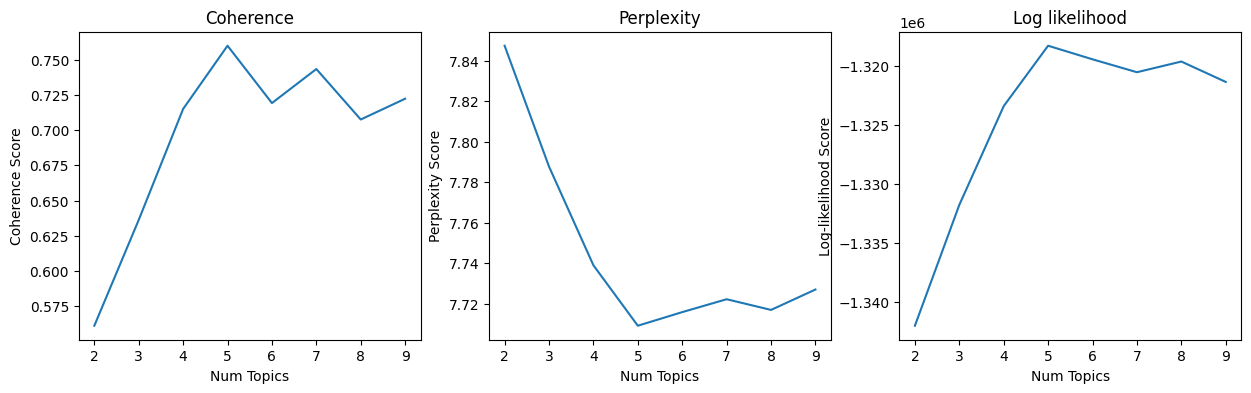

In [51]:
ms = ModelSelector(dictionary=id2word, vectorizer='count', lib='skl')
model_list, coherence_values, perplexity_list, log_likelihood_scores = ms()

## Model 1.1 Sklearn LDA with Tfidf vectorizer

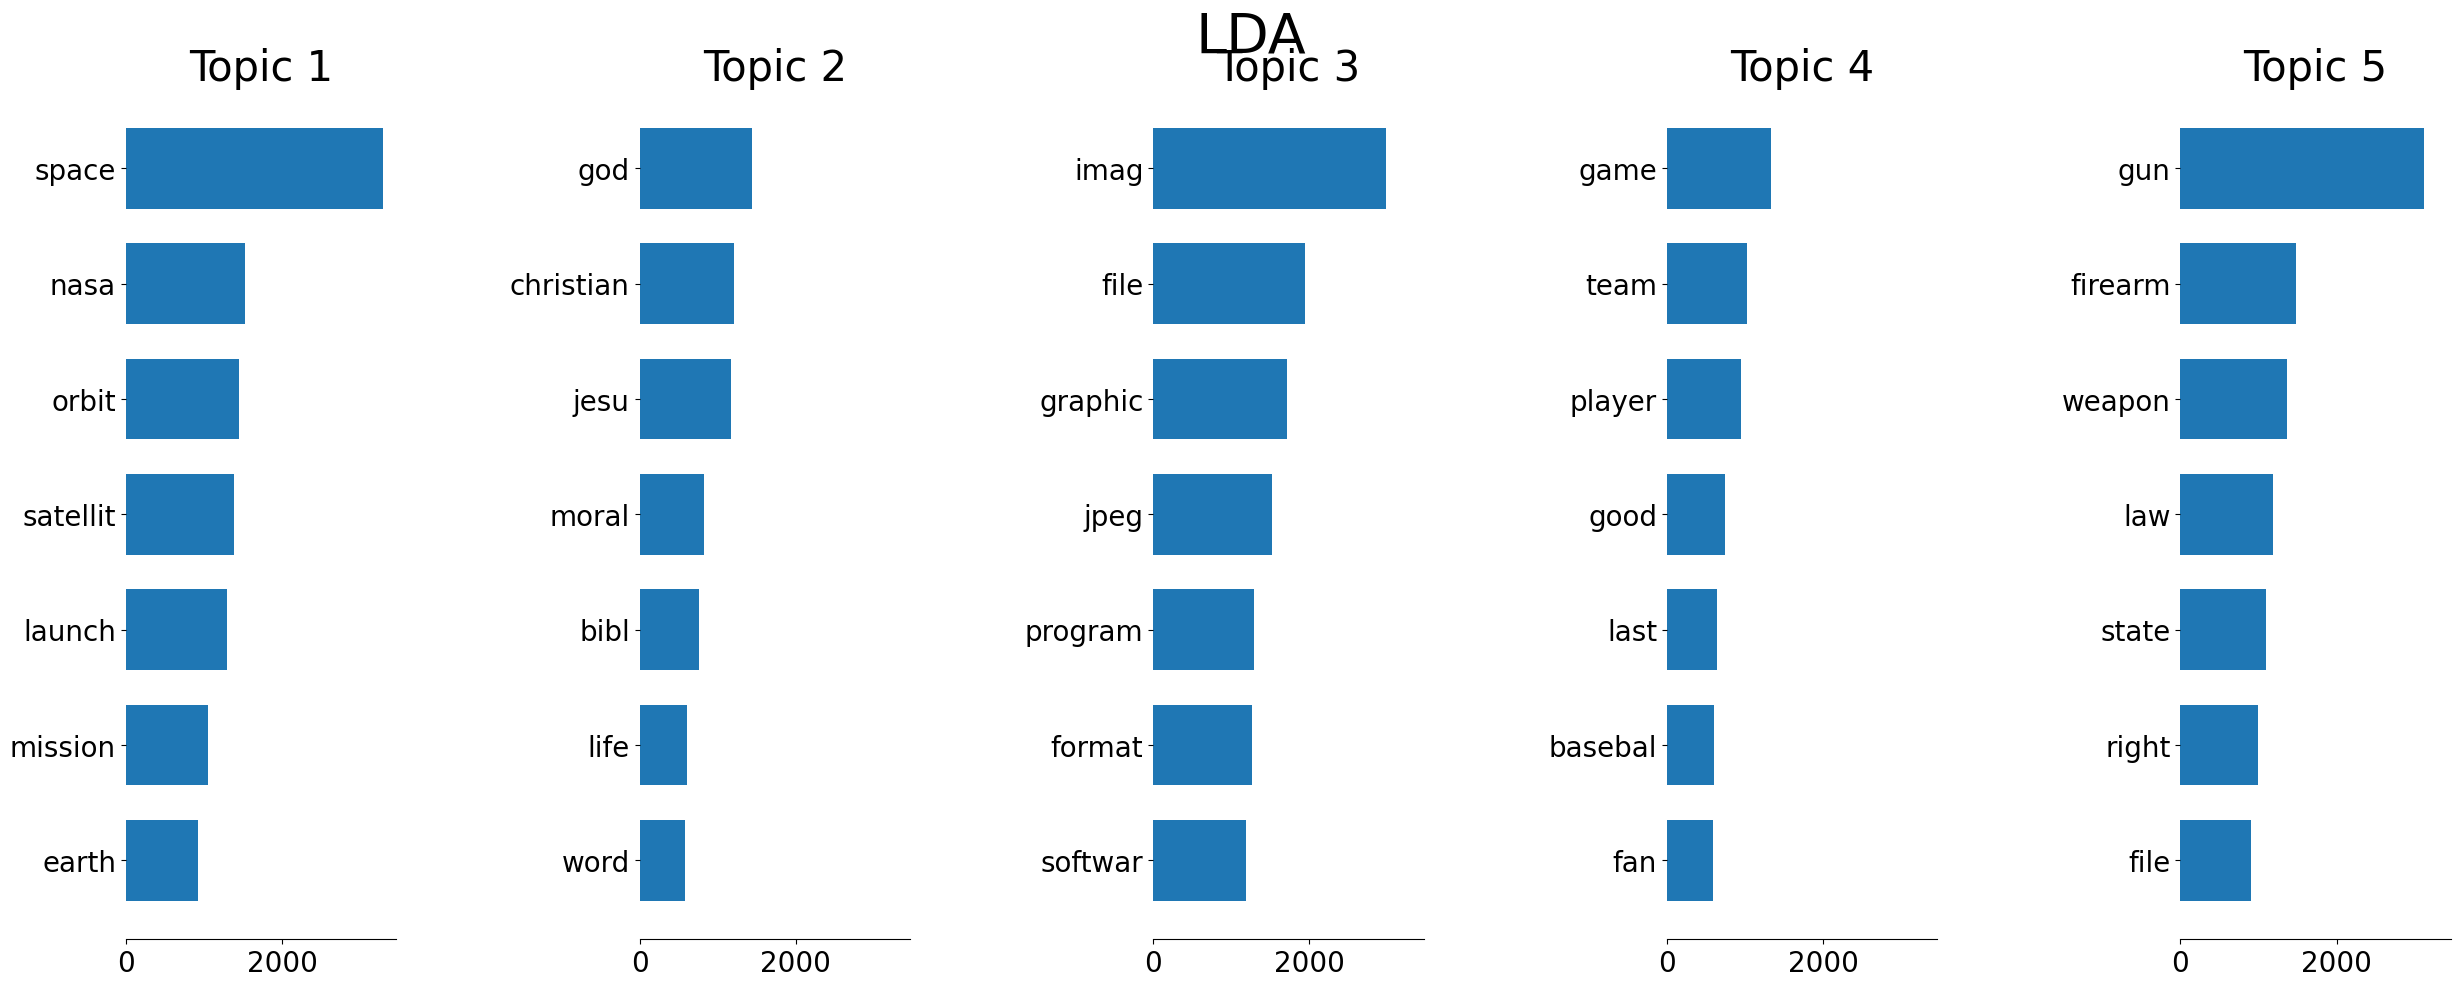

In [20]:
lda_modeller_skl_tfidf = LDAmodeller(df=df, vectorizer = 'tfidf', lib = 'skl')
lda_modeller_skl_tfidf.train_lda()

W1 = lda_modeller_skl_tfidf.lda_model.transform(lda_modeller_skl.vectorized_sentences)
H1 = lda_modeller_skl_tfidf.lda_model.components_

In [21]:
# Estimate model accuracy
topic_vocab = {0: 'space', 1: 'religion', 2: 'graphics', 3: 'sport', 4: 'politics'}

est_accuracy(topic_vocab = topic_vocab, lda_modeller = lda_modeller_skl_tfidf)

Supposed model accuracy: 0.8581997533908755


In [26]:
print_n_words_per_topic(lda_modeller = lda_modeller_skl_tfidf)

space nasa orbit satellit launch mission earth lunar shuttl system moon rocket technolog probe flight


god christian jesu moral bibl life word even religion child man christ good law way


imag file graphic jpeg program format softwar ftp color gif pub avail datum mail system


game team player good last basebal fan season leagu run cub pitcher win first col


gun firearm weapon law state right file crime govern handgun control crimin bill fire militia




In [28]:
# Topic per document probability distribution
df_doc_topic = topic_per_doc_matrix(lda_modeller = lda_modeller_skl_tfidf)
df_doc_topic.head(3)

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.0,0.00,0.0,0.00,1.00,4
Doc1,0.0,0.00,0.0,1.00,0.00,3
Doc2,0.0,0.28,0.0,0.15,0.57,4


In [29]:
vocab, words, id2word = coherence_perp_logl(lda_modeller = lda_modeller_skl_tfidf)

The coherence score is: 0.799
The log perplexity score is: 7.654
The log likelihood is: -6708029.332


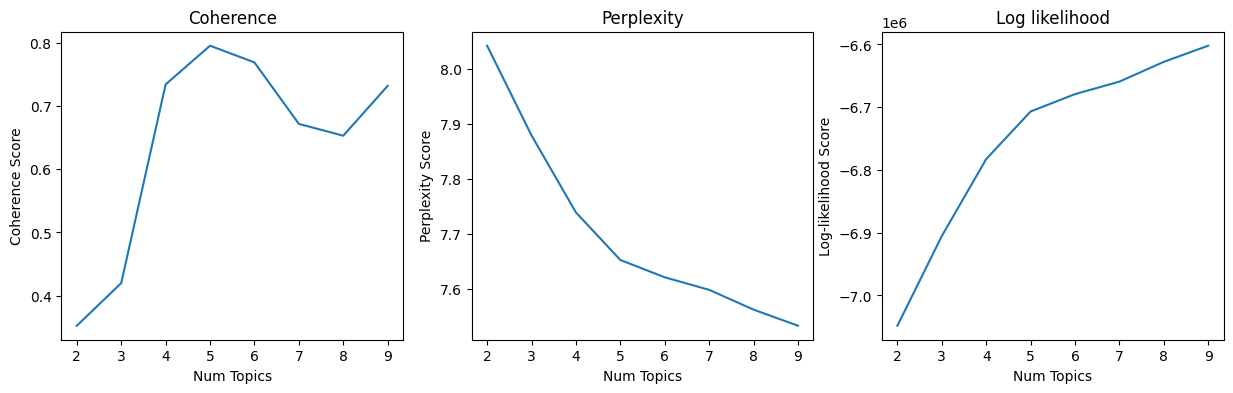

In [14]:
model_list, coherence_values, perplexity_list, log_likelihood_scores = metrics_model_selection(dictionary=id2word, words=words)

## Model 2. LDA with Gensim

In [65]:
# Imports and stopwords extension
%run pkgs/dependencies_stopwords.ipynb

# # Dataset preparation (only run once)
# %run pkgs/fetch20_dataset_preparation.ipynb

# Define data preprocessor object
%run pkgs/data_preprocessors.ipynb

# Define the sklearn LDA model with Count Vectorizer
%run pkgs/lda_modeller.ipynb

# Define auxillary functionality
%run pkgs/auxillary_functions.ipynb


# Read and preprocess the data
# prep = Preprocessor(path = 'four_groups.csv')
# df = prep(remove_digit_words = True, remove_short_words = True)

# df = df[df['text'].map(lambda x: len(x.split())) > 5]

In [66]:
lda_modeller_gensim = LDAmodellerGensim(df, vectorizer = 'count')

In [67]:
lda_modeller_gensim.train_lda()

[(0,
  '0.018*"space" + 0.006*"nasa" + 0.006*"orbit" + 0.005*"satellit" + '
  '0.005*"launch" + 0.005*"earth" + 0.005*"system" + 0.004*"mission" + '
  '0.004*"first" + 0.003*"shuttl"'),
 (1,
  '0.007*"god" + 0.006*"christian" + 0.006*"thing" + 0.006*"way" + '
  '0.005*"even" + 0.005*"point" + 0.005*"jesu" + 0.004*"mani" + 0.004*"life" + '
  '0.004*"good"'),
 (2,
  '0.017*"gun" + 0.007*"right" + 0.007*"law" + 0.006*"weapon" + '
  '0.006*"firearm" + 0.006*"state" + 0.005*"file" + 0.005*"govern" + '
  '0.004*"control" + 0.004*"crime"'),
 (3,
  '0.010*"good" + 0.009*"game" + 0.007*"team" + 0.006*"well" + 0.006*"last" + '
  '0.005*"player" + 0.004*"much" + 0.004*"first" + 0.004*"run" + 0.004*"lot"'),
 (4,
  '0.014*"imag" + 0.008*"file" + 0.008*"graphic" + 0.007*"program" + '
  '0.006*"avail" + 0.005*"system" + 0.005*"softwar" + 0.005*"format" + '
  '0.005*"mail" + 0.005*"jpeg"')]


In [71]:
topic_vocab = {0: 'space', 1: 'religion', 2: 'politics', 3: 'sport', 4: 'graphics'}
est_accuracy_gensim(lda_model=lda_modeller_gensim.lda_model)

Supposed model accuracy: 0.8417591450883682


In [19]:
lda_modeller_skl.lda_model

AttributeError: 'LDAmodeller' object has no attribute 'lda_model'

In [364]:
def model_generator(model_list_gamma):
    for i, lda_model in enumerate(model_list_gamma):
        yield i, lda_model

gen = model_generator(model_list_gamma)

In [365]:
cur_best

0.8429921907110564

In [31]:
i, lda_model = next(gen)

pprint(lda_model.print_topics())

NameError: name 'gen' is not defined

In [35]:
# Try increasing the number of passes and iterations to 1000 - clearer topics but the wait time is too long
# Try setting per_word_topics to false - slightly better results
# Try reducing chunksize to 1000 - no effect
# Try setting the batch parameter to true - no effect
# Try setting the offset parameter to 50 - slightly worse
# Try setting eval_every parameter to 1 - worse
# Try setting eval_every parameter to 50 - no effect
# Try setting minimum_probability to 0.001 - no effect
# Try setting minimum_probability to 0 - no effect
# Try setting minimum_probability to 0.1 - no effect
# Try setting minimum_phi_value to 0.001 - no effect
# Try setting minimum_phi_value to 0 - no effect
# Try setting minimum_phi_value to 0.1 - no effect
# Try setting gamma_threshold to 0.0001 - no effect
# Try setting gamma_threshold to 0.00001 - no effect
# Try setting gamma_threshold to 0.01 - no effect
# Try setting gamma_threshold to 0.1 - slightly worse
# Try setting alpha to asymmetric - Barely any effect
# Try setting alpha to 0.1 - no effect
# Try setting alpha to 0.01 - no effect
# Try setting alpha to 0.001 - no effect
# Try setting alpha to 0.3 - no effect
# Try setting alpha to 0.6 - no effect
# Try setting alpha to 0.9 - worse
# Try setting eta to 0.001 - no effect
# Try setting eta to 0.01 - slightly worse
# Try setting eta to 0.1 - slightly worse
# Try setting eta to 0.3 - better!
# Try setting eta to 0.6 - better than 0.3
# Try setting eta to 0.9 - insignificantly better than 0.6. Leave at 0.6.
# Try setting decay to 0.1 - very small positive change
# Try setting decay to 0.3 - no effect
# Try setting decay to 0.7 - worse
# Try setting decay to 0.9 - much worse
# Try setting offset to 5 - no effect
# Try setting offset to 10 - no effect
# Try setting offset to 50 - much worse
# Try setting offset to 100 - much worse
# Try using bigrams - worse
# Try using trigrams - worse
# Try setting eta to 2 - worse
# Try tuning alpha and eta simultaneously - best results is alpha 8 and eta 0.9
# Try tuning the gamma value - best results with 8

In [ ]:
# FOR SKLEARN LDA WITH CountVectorizer

# Try not to add extra stpowords - no effect
# Try removing very short texts (with len < 30) - THIS SIGNIFICANTLY BUMPS THE ACCURACY BUT VASTLY REDUCES THE NUMBER OF TEXT SAMPLES
# Try reducing the max_df parameter of count vectorizer - no effect
# Try using changing binary parameter for CountVectorizer - better to keep False
# Try changing ngram range - better to keep at default
# Try changing min_df - 2 is optimal
# Try adding VERB - worse result
# Try adding ADV - +2 percent
# Try setting the learning method to online - worse
# Try tweaking doc_topic_prior - insignificant effect
# Try tweaking topic_word_prior - 0.6 yields best results
# Try increasing learning offset - no effect
# Try setting evaluate_every parameter to 1 - no effect
# Try ngrams (2,3) - worse
# Try removing words < 3 - no effect
# Try adding a few more stopwords that are common among topics in the barplot - no effect
# Try increasing the number of iterations to 1000 - no effect
# Try to setting the remove_digit_words to False - worse
# Try reducing the num_features parameter to get only the most common words - worse
# Try without stemming - no effect
# Try without stemming and without lemmatization - worse
# Try not to limit the number of POS tags in lemma - worse
# Try setting remove_stop_words to False and not to use stop_words in count vectorizer - worse
# Try with remove_nonalphanumeric_characters set to False - worse
# Try using en_core_web_lg - insignificant change
# Try doing lemmatization with Wordnet lemmatizer - worse
# Try lemmatization with the added -PRON- filter - no effect
# Try stemming withot lemmatization - very minor positive change
# Try using Snowball stemmer without lemmatization - worse
# Try using Snowball stemmer with lemmatization - worse
# Try using Lancaster stemmer without lemmatization - worse
# Try using Lancaster stemmer with lemmatization - very minor negative change
# Try substituting punctuation with a space rather than empty str - not much effect, but makes more sense
# Try removing texts shorter than 6 words after lemmatization - Had positive effect! (Consider using for short sequences.)
# Try adding INTJ tag - much worse
# Try adding the PRON tag - no effect
# Try adding the PRON and PROPN tags - better result!
# Try adding SCONJ tag - worse

In [16]:
## Model 2. LDA Scikit-learn implementation

In [ ]:
#  You can try to put aside the docs which don't have a very high cofidence in a particular topic for further manual categorization